# Clustering and Marketing

## Import Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import datetime as dt
from prophet import Prophet
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as tts 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

## Import File

In [2]:
bh = pd.read_csv(r"C:\Users\HWLEE\Desktop\study\Project data\shopping\shopping_behavior_updated.csv")

print(bh.head())


   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [3]:
print(bh.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Check the unique variables and each counts


In [4]:
genders = bh['Gender'].value_counts()
sizes = bh['Size'].value_counts()
shipping = bh['Shipping Type'].value_counts()
promo = bh['Promo Code Used'].value_counts()
disc = bh['Discount Applied'].value_counts()

print("Gender variables:\n", genders)
print("Size variables:\n", sizes)
print("Shipping Type variables:\n", shipping)
print("promo Type variables:\n", promo)
print("disc Type variables:\n", disc)

Gender variables:
 Gender
Male      2652
Female    1248
Name: count, dtype: int64
Size variables:
 Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64
Shipping Type variables:
 Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64
promo Type variables:
 Promo Code Used
No     2223
Yes    1677
Name: count, dtype: int64
disc Type variables:
 Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64


## K-Means Clustering

In [5]:
bh_a = bh.select_dtypes(include=[float, int, bool]) 


In [6]:
Kmeans=KMeans(n_clusters=4,init='k-means++')
Kmeans.fit(bh_a)

C:\Users\HWLEE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [7]:
pred=Kmeans.predict(bh_a)
pred

array([3, 3, 3, ..., 2, 2, 2])

I tried to use 'Age' and 'Purchase Amount (USD)' for clustering.

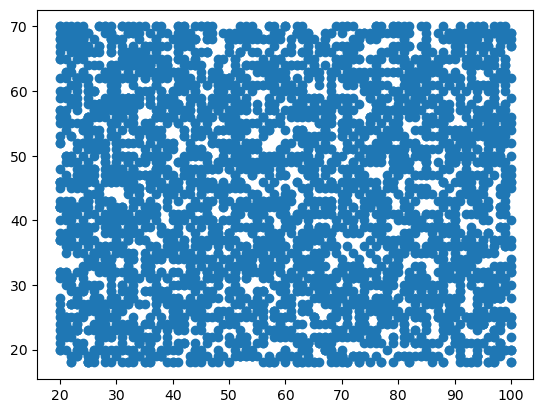

In [8]:
x_axis=bh_a.loc[:,['Purchase Amount (USD)']]
y_axis=bh_a.loc[:,['Age']]
plt.scatter(x_axis,y_axis)
plt.show()

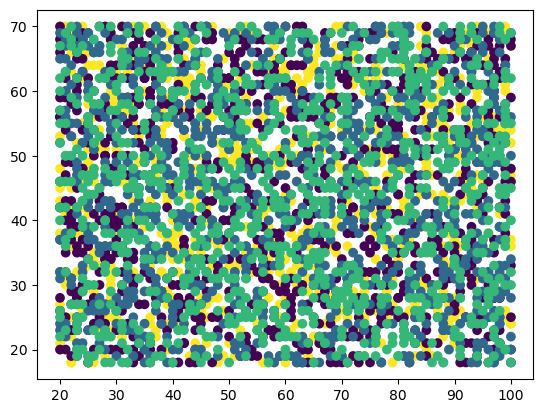

In [9]:
plt.scatter(x_axis,y_axis,c=pred)
plt.show()

But it didn't clustered well enough as above scatter plot. So I will add different variables for clustering. I created two columns using Gender column to make it boolean format. Then I only selected few columns.

In [10]:
bhn = pd.get_dummies(bh, columns=['Gender'], drop_first=False)

bh_n = bhn.select_dtypes(include=[float, int, bool]) 
bh_n

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Female,Gender_Male
0,1,55,53,3.1,14,False,True
1,2,19,64,3.1,2,False,True
2,3,50,73,3.1,23,False,True
3,4,21,90,3.5,49,False,True
4,5,45,49,2.7,31,False,True
...,...,...,...,...,...,...,...
3895,3896,40,28,4.2,32,True,False
3896,3897,52,49,4.5,41,True,False
3897,3898,46,33,2.9,24,True,False
3898,3899,44,77,3.8,24,True,False


In [11]:
bhx = bh_n[['Age', 'Purchase Amount (USD)', 'Review Rating','Gender_Female','Previous Purchases']]

Now I checked Elbow Method.

C:\Users\HWLEE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HWLEE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HWLEE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HWLEE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HWLEE\anaconda3\Lib\site-packages\sklearn\clust

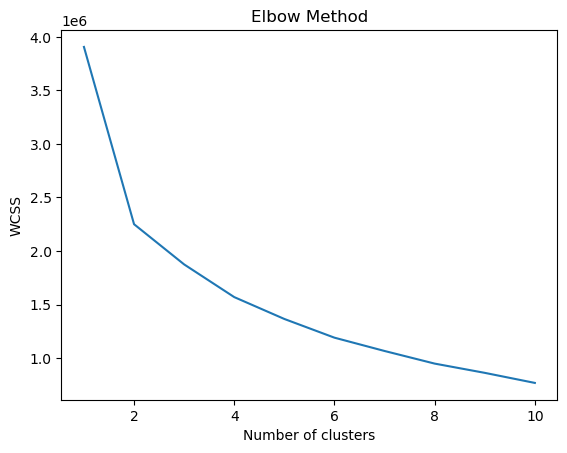

In [12]:
wcss=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0)
    Kmeans.fit(bhx)
    wcss.append(Kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()





I used 4 as number of clusters, and it clustered as below table.

In [13]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter= 300, random_state=0)
labels = kmeans.fit_predict(bhx)
bhx['cluster'] = labels
bhx.head()

C:\Users\HWLEE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HWLEE\AppData\Local\Temp\ipykernel_28552\1005326170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bhx['cluster'] = labels


,Age,Purchase Amount (USD),Review Rating,Gender_Female,Previous Purchases,cluster
0,55,53,3.1,False,14,0
1,19,64,3.1,False,2,1
2,50,73,3.1,False,23,2
3,21,90,3.5,False,49,1
4,45,49,2.7,False,31,0


After I used more variables, the data was clustered significantly.

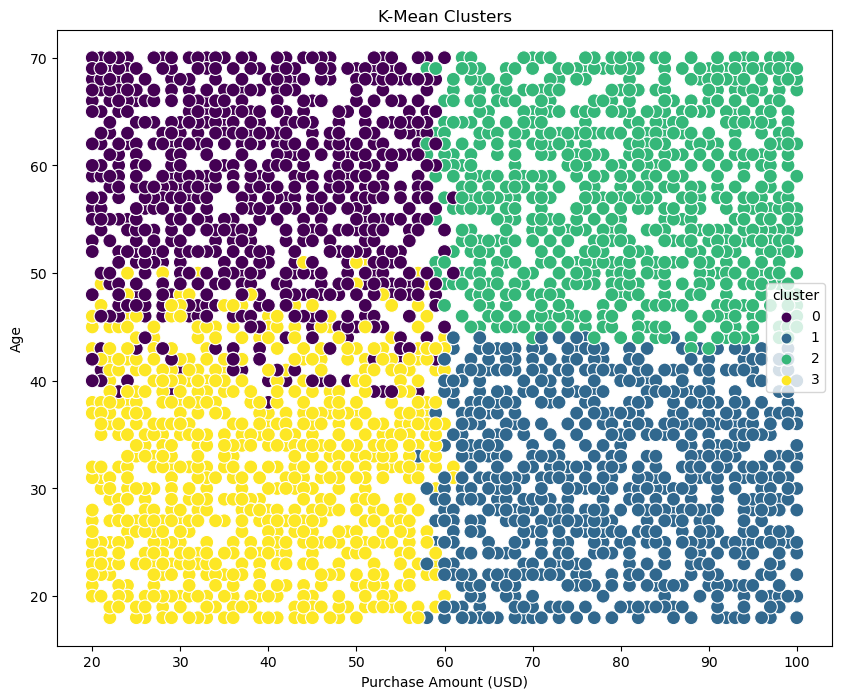

In [14]:
plt.figure(figsize=(10, 8))


sns.scatterplot(data=bhx, x='Purchase Amount (USD)', y='Age', hue='cluster', palette='viridis', s=100)
plt.title('K-Mean Clusters')

plt.show()

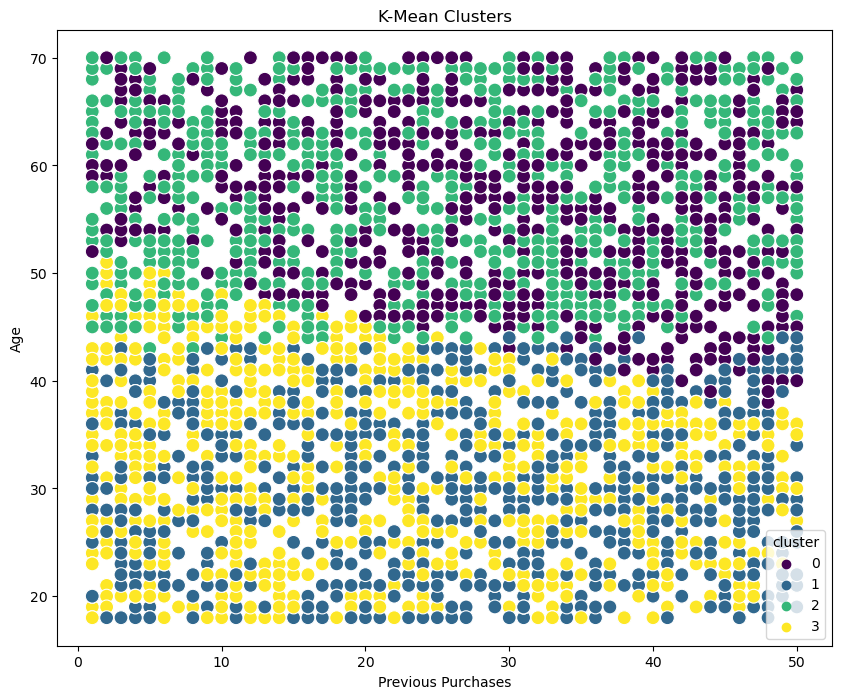

In [15]:
plt.figure(figsize=(10, 8))


sns.scatterplot(data=bhx, x='Previous Purchases', y='Age', hue='cluster', palette='viridis', s=100)
plt.title('K-Mean Clusters')

plt.show()

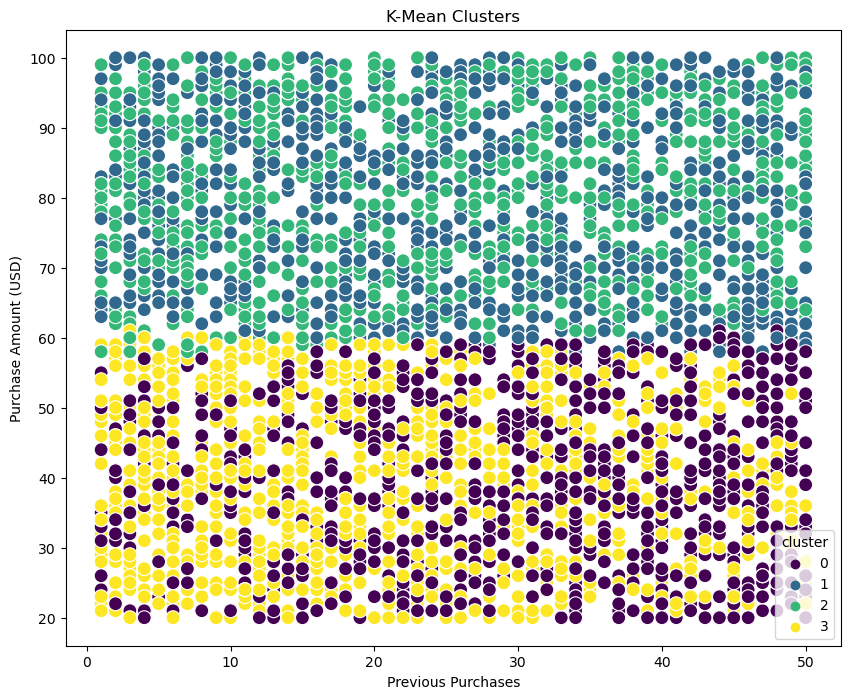

In [16]:
plt.figure(figsize=(10, 8))


sns.scatterplot(data=bhx, x='Previous Purchases', y='Purchase Amount (USD)', hue='cluster', palette='viridis', s=100)
plt.title('K-Mean Clusters')

plt.show()

### PCA

In [17]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(bhx)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
bhx_PCA = pca.fit_transform(bhx)
print(n_components)

3


I created this clustered data on 3D plot.

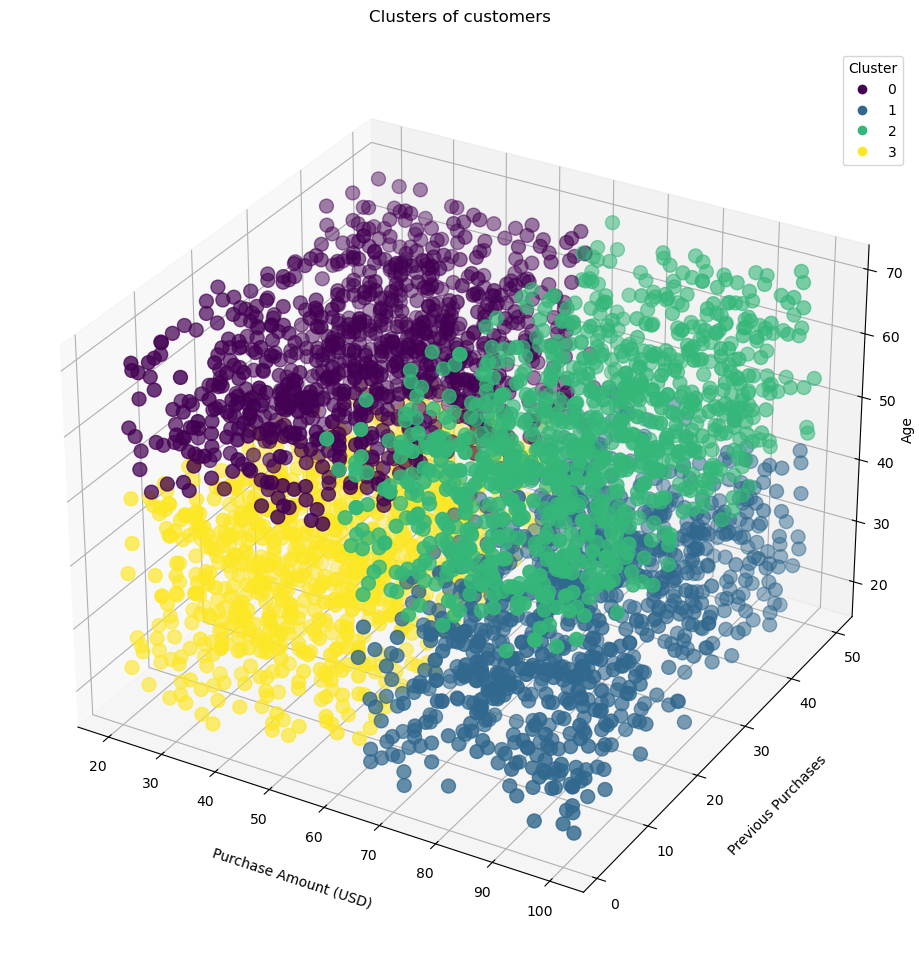

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


plt.figure(figsize=(20, 10))
tx = plt.axes(projection='3d')

x = bhx['Purchase Amount (USD)']
y = bhx['Previous Purchases']
z = bhx['Age']  

scatter = tx.scatter(x, y, z, c=bhx['cluster'], cmap='viridis', s=100)

tx.set_xlabel('Purchase Amount (USD)', labelpad=15)
tx.set_ylabel('Previous Purchases', labelpad=15)
tx.set_zlabel('Age', labelpad=0,rotation=90) 
plt.title('Clusters of customers', pad=20)

plt.legend(*scatter.legend_elements(), title='Cluster')
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.show()

In [19]:
bhx.groupby('cluster').mean()

,Age,Purchase Amount (USD),Review Rating,Gender_Female,Previous Purchases
cluster,,,,,
0,56.970894,38.949064,3.686071,0.313929,28.907484
1,30.442523,79.646999,3.783316,0.313327,25.880977
2,57.133874,80.640974,3.783063,0.326572,25.140974
3,31.787410,39.016512,3.745820,0.326109,21.498452


### LTV Calculation

In [20]:
# Grouping by clusters
cluster_data = bhx.groupby('cluster').agg({
    'Purchase Amount (USD)': 'sum',
    'Previous Purchases': 'mean',
    'Age': 'count'  # no of customers
}).reset_index()

# calculate metrics
cluster_data['Avg purchase price'] = cluster_data['Purchase Amount (USD)'] / cluster_data['Age']
cluster_data['Freq purchase'] = cluster_data['Previous Purchases']
cluster_data['lifecycle period (yr)'] = 3  

# LTV calculation
cluster_data['LTV'] = cluster_data['Avg purchase price'] * cluster_data['Freq purchase'] * cluster_data['lifecycle period (yr)']
cluster_data


,cluster,Purchase Amount (USD),Previous Purchases,Age,Avg purchase price,Freq purchase,lifecycle period (yr),LTV
0,0,37469,28.907484,962,38.949064,28.907484,3,3377.758420
1,1,78293,25.880977,983,79.646999,25.880977,3,6184.026351
2,2,79512,25.140974,986,80.640974,25.140974,3,6082.177775
3,3,37807,21.498452,969,39.016512,21.498452,3,2516.383824


## Conclusion

Cluster 0 - Old ages, Low purchase amount, Low avg review score, High previous purchses, Low female portion\
Cluster 1 - Young ages, High purchase amount, High avg review score, Avg previous purchses, Low female portion\
Cluster 2 - Old ages, High purchase amount, High avg review score, Avg previous purchses, High female portion\
Cluster 3 - Young ages, Low purchase amount, Middle avg review score, Low previous purchses, High female portion	

Based on Purchase Amount (USD) and Previous Purchases :\
Cluster 0: Customers with frequent small-value purchases.\
     -  Strategy: Offer discount coupons to encourage repeat purchases and build loyalty.\
Cluster 1: Customers who purchase high-value products.\
     - Strategy: Recommend premium products on the website/app and provide VIP events.\
Cluster 2: Older customers with high-value purchases.\
     - Strategy: Implement tailored marketing campaigns based on age-related preferences and needs.\
Cluster 3: Customers with irregular purchasing patterns.\
     - Strategy: Promote engaging events and special offers to increase the retention rate and boost purchases.

### LTV base Marketing
- High LTV Clusters (cluster 1,2): Focus on retention strategies and upselling (additional purchases). 
     - Recommand premium products and personalized campaigns
- Low LTV Clusters (cluster 0,3): Implement engagement strategies, such as targeted marketing, to increase their value.
     - Advertise promotions and provide discount coupons